<a href="https://colab.research.google.com/github/SmartDogy/ML_Playground/blob/main/logistic_regression__gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
dataset = pd.read_csv('/content/realistic_logistic_placement_data_less_noise.csv')

In [ ]:
dataset.head()

,CGPA,Experience,Placed
0,7.748357,2.780328,1
1,7.430868,3.357113,1
2,7.823844,4.477894,1
3,8.261515,2.481730,1
4,7.382923,2.191506,1


In [ ]:
X = dataset[['CGPA','Experience']].values
Y = dataset['Placed'].values

In [ ]:
dataset.shape

(150, 3)

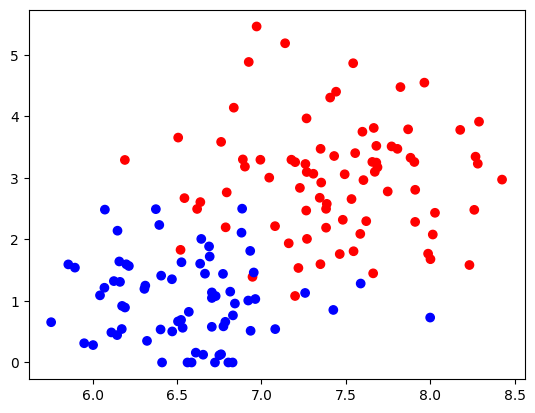

In [ ]:
plt.scatter(dataset['CGPA'], dataset['Experience'], c=Y, cmap = 'bwr')

In [ ]:
def sigmoid(z):
  return 1 /(1 + np.exp(-z))

def gradient_descent(X, Y):
  X = np.insert(X, 0, 1, axis = 1)
  weights = np.ones(3)
  lr = 0.6
  for i in range(75000):
    Y_hat = sigmoid(np.dot(X, weights))
    error = Y.ravel() - Y_hat
    gd = np.dot(X.T, error) / len(X)
    weights = weights + lr * gd
    # w = w + lr . 1/m(x^T(T stands for transpose) . y - y_hat)
  return weights[1: ], weights[0]

In [ ]:
weigths, bias = gradient_descent(X, Y)
print("Weights:", weigths)
print("Bias:", bias)

Weights: [4.60928409 3.93942596]
Bias: -39.41926162107592


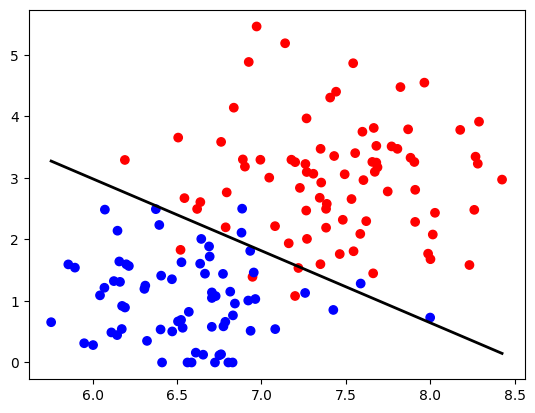

In [ ]:
w1, w2 = weigths
x_value = np.linspace(X[:, 0].min(), X[:, 0].max(), 150)
y_value = -(w1 * x_value + bias)/ w2
plt.scatter(dataset['CGPA'], dataset['Experience'], c = Y, cmap='bwr')
plt.plot(x_value, y_value, color = 'black', linewidth = 2)

In [ ]:
lr = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
lr.fit(x_train, y_train)
lr.predict(x_test)

array([1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0])

Text(0, 0.5, 'Experienced')

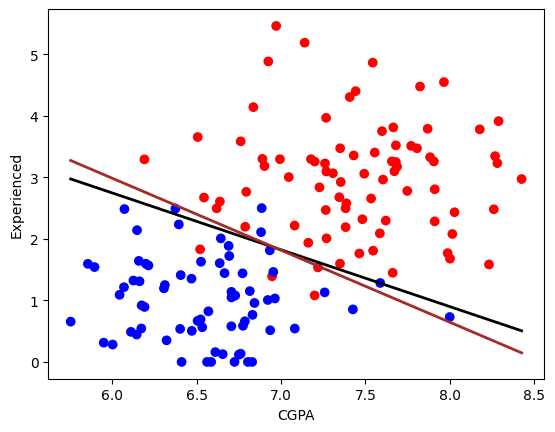

In [ ]:
a = lr.coef_[0]
b = lr.intercept_[0]
val1 = np.linspace(dataset['CGPA'].min(), dataset['CGPA'].max(), 150)
val2 = -(a[0]*val1 + b)/a[1]
plt.scatter(dataset['CGPA'], dataset['Experience'], c = Y, cmap = 'bwr')
plt.plot(val1, val2, color = 'black', linewidth = 2)
plt.plot(x_value, y_value, color = 'brown', linewidth = 2)
plt.xlabel('CGPA')
plt.ylabel('Experienced')